In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
file_one = "Resources\Data1.csv"
file_two = "Resources\Data2.csv"

In [13]:
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_two_df = pd.read_csv(file_two, encoding="ISO-8859-1")

In [14]:
file_one_df["DATE"]=file_two_df["DATE"]
file_one_df.head()


,Temperature,Revenue,DATE
0,24.566884,534.799028,01/01/1972
1,26.005191,625.190122,01/02/1972
2,27.790554,660.632289,01/03/1972
3,20.595335,487.706960,01/04/1972
4,11.503498,316.240194,01/05/1972


In [15]:
file_one_df["value"]=file_two_df["value"]
file_one_df.head()

,Temperature,Revenue,DATE,value
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636


In [16]:
data=file_one_df

In [17]:
data.rename(columns={"DATE": "Date", "value": "Consumption (Million Gallons)"})

,Temperature,Revenue,Date,Consumption (Million Gallons)
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636
...,...,...,...,...
495,22.274899,524.746364,01/04/2013,107.9098
496,32.893092,755.818399,01/05/2013,110.9130
497,12.588157,306.090719,01/06/2013,128.6909
498,22.362402,566.217304,01/07/2013,112.3692


In [18]:
x_axis=data.Temperature
y_axis=data.Revenue

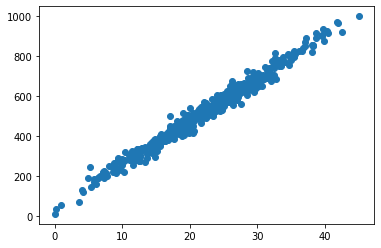

In [19]:
plt.scatter(x_axis, y_axis)


Random Forest Classifier
------------------------------------------

In [21]:
# data preview
data.head(10)

,Temperature,Revenue,DATE,value
0,24.566884,534.799028,01/01/1972,59.9622
1,26.005191,625.190122,01/02/1972,67.0605
2,27.790554,660.632289,01/03/1972,74.2350
3,20.595335,487.706960,01/04/1972,78.1120
4,11.503498,316.240194,01/05/1972,84.7636
5,14.352514,367.940744,01/06/1972,100.5960
6,13.707780,308.894518,01/07/1972,100.1263
7,30.833985,696.716640,01/08/1972,96.3607
8,0.976870,55.390338,01/09/1972,85.8007
9,31.669465,737.800824,01/10/1972,70.3934


In [22]:
# Assigning X and y values
X = data['Temperature'].values
y = data['Revenue'].values

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [32]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\shweta shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
# Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([564.3907967 , 899.79964884, 334.56998864, 334.77111235,
       381.58020043, 546.15151474, 708.26428166, 458.68995552,
       780.38066592, 265.12753618, 240.92446848, 444.91995406,
       585.00504512, 367.2846151 , 425.50752686, 622.48195104,
       495.6400325 , 806.59313027, 292.77274318, 610.34056415,
       132.16850172, 319.05608533, 510.90231108, 580.77888107,
       319.05608533, 462.81185336, 183.38909345, 551.85651544,
       510.90231108, 537.36152333, 464.40972482, 369.41790714,
       517.63431888, 334.56998864, 365.77683988, 381.58020043,
       627.5236783 , 639.73031851, 580.52724323, 496.84222776,
       452.91597849, 208.26819037, 631.17851875, 830.37511947,
       278.33850798, 390.49778729, 574.9019988 , 830.37511947,
       445.88065347, 376.0171796 , 384.90214177, 806.59313027,
       510.90231108, 317.05025221, 617.67949892, 679.1478697 ,
       364.23970306, 631.17851875, 493.25606882, 529.07605232,
       691.59553412, 641.87473769, 631.25193011, 702.43

In [26]:
# Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,569.618756,564.390797
1,891.413646,899.799649
2,351.288869,334.569989
3,268.929179,334.771112
4,401.924792,381.580200
...,...,...
245,219.303993,276.673997
246,719.471701,695.307864
247,506.493748,550.363909
248,534.799028,566.320389


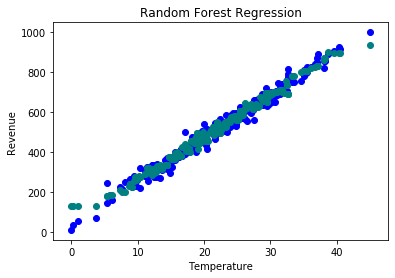

In [29]:
# Visualising the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'teal')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

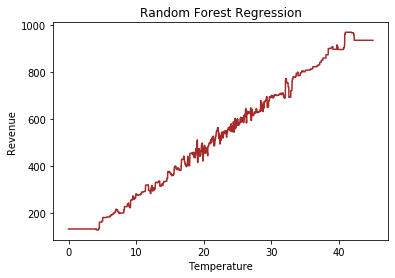

In [30]:
# Visualising the Random Forest Regression Results
plt.plot(X_grid, regressor.predict(X_grid), color = 'brown')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [34]:
# Predicting revenue at a given temperature
T = 20
Revenue = regressor.predict([[T]])
Revenue

array([473.14514565])